In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def list_files_in_directory(path):
    files = [ f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) ]
    return files

In [3]:
path_directory = '/home/hwkang/jupyter/root/result/exp10/perf'

In [4]:
image_directory_path = '/home/hwkang/jupyter/root/result/exp10/image/'

In [5]:
files_list = list_files_in_directory(path_directory)

In [6]:
files_list.sort()

In [7]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [8]:
def show_boxplot(path_directory, files_list, file_index_start, target_column, title, show=True, save=False, save_path=None):
    df_delta = pd.read_csv(os.path.join(path_directory, files_list[file_index_start+0]))
    df_ttfs = pd.read_csv(os.path.join(path_directory, files_list[file_index_start+1]))
    df_stime = pd.read_csv(os.path.join(path_directory, files_list[file_index_start+2]))
    df_srate = pd.read_csv(os.path.join(path_directory, files_list[file_index_start+3]))

    # 데이터프레임 목록과 이름
    dataframes = {'Delta': df_delta, 'TTFS': df_ttfs, 'S. time': df_stime, 'S. rate': df_srate}

    # 특정 열에 대한 박스 플롯
    column_to_plot = target_column  # 박스 플롯으로 시각화할 열
    filtered_dataframes = {name: remove_outliers(df, column_to_plot) for name, df in dataframes.items()}

    # 박스 플롯을 위한 데이터 준비
    data_to_plot = [df[column_to_plot] for df in filtered_dataframes.values()]

    # 그래프 그리기
    plt.figure(figsize=(6, 6))
    plt.boxplot(data_to_plot, labels=filtered_dataframes.keys())

    # 축과 레이블 추가
    plt.xlabel('Encoding type')
    if( target_column == 'duration' ):
        plt.ylabel(column_to_plot+' (us)')
    elif( target_column == 'pkg' ):
        plt.ylabel('CPU energy consumption (uJ)')
    else:
        plt.ylabel('DRAM energy consumption (uJ)')
    plt.title(title)
    plt.grid(True)

    if save:
        plt.savefig(save_path)
    
    # 그래프 출력
    if show:
        plt.show()

In [9]:
save_paths = [
    os.path.join(path_directory,'Input_1_[28x28-50-1000].png'),
    os.path.join(path_directory,'Input_2_[32x32-50-1000].png'),
    os.path.join(path_directory,'Input_3_[256x144-50-1000].png'),
    os.path.join(path_directory,'Input_4_[640x480-50-1000].png'),
    os.path.join(path_directory,'Step_1_[32x32-25-1000].png'),
    os.path.join(path_directory,'Step_2_[32x32-50-1000].png'),
    os.path.join(path_directory,'Step_3_[32x32-100-1000].png'),
    os.path.join(path_directory,'Step_4_[32x32-1000-1000].png'),
    os.path.join(path_directory,'Iter_1_[32x32-50-1000].png'),
    os.path.join(path_directory,'Iter_2_[32x32-50-2000].png'),
    os.path.join(path_directory,'Iter_3_[32x32-50-4000].png'),
    os.path.join(path_directory,'Iter_4_[32x32-50-8000].png')
]

titles = [
    '[Input_size, Num_step, Num_iter]: [28x28, 50, 1000]',
    '[Input_size, Num_step, Num_iter]: [32x32, 50, 1000]',
    '[Input_size, Num_step, Num_iter]: [256x144, 50, 1000]',
    '[Input_size, Num_step, Num_iter]: [640x480, 50, 1000]',
    '[Input_size, Num_step, Num_iter]: [32x32, 25, 1000]',
    '[Input_size, Num_step, Num_iter]: [32x32, 50, 1000]',
    '[Input_size, Num_step, Num_iter]: [32x32, 100, 1000]',
    '[Input_size, Num_step, Num_iter]: [32x32, 1000, 1000]',
    '[Input_size, Num_step, Num_iter]: [32x32, 50, 1000]',
    '[Input_size, Num_step, Num_iter]: [32x32, 50, 2000]',
    '[Input_size, Num_step, Num_iter]: [32x32, 50, 4000]',
    '[Input_size, Num_step, Num_iter]: [32x32, 50, 8000]',
]

In [10]:
"""
for i in range(12):
    show_boxplot(path_directory, files_list, file_index_start=i*4, target_column='duration', title=titles[i], show=False, save=True, save_path=save_paths[i])

for i in range(12):
    show_boxplot(path_directory, files_list, file_index_start=i*4, target_column='pkg', title=titles[i], show=False, save=True, save_path=save_paths[i])

for i in range(12):
    show_boxplot(path_directory, files_list, file_index_start=i*4, target_column='dram', title=titles[i], show=False, save=True, save_path=save_paths[i])
    """
print("")

In [44]:
def show_boxplot_group(path_directory, files_list, labels, target_column='duration', title='Input size variation', median=False, save=False, save_path=None):
    csvs = []
    for file in files_list:
        csvs.append(pd.read_csv(os.path.join(path_directory, file)))

    # 데이터프레임 목록과 그룹 레이블
    dataframes = {
        'Delta': [csvs[0], csvs[1], csvs[2], csvs[3]],
        'TTFS': [csvs[4], csvs[5], csvs[6], csvs[7]],
        'S. time': [csvs[8], csvs[9], csvs[10], csvs[11]],
        'S. rate': [csvs[12], csvs[13], csvs[14], csvs[15]]
    }

    # 특정 열에 대한 박스 플롯
    column_to_plot = target_column

    # 박스 플롯을 위한 데이터와 그룹 레이블 준비
    data_to_plot = []

    for label, dfs in dataframes.items():
        for df in dfs:
            data_to_plot.append(df[column_to_plot])

    # Plot graph
    plt.figure(figsize=(6, 8))
    graph_box = plt.boxplot(data_to_plot, showfliers=False, patch_artist=True)

    # Set box's color
    colors_4_box = [
        'red', 'blue', 'green', 'orange',
        'red', 'blue', 'green', 'orange',
        'red', 'blue', 'green', 'orange',
        'red', 'blue', 'green', 'orange']
    for patch, color in zip(graph_box['boxes'], colors_4_box):
        patch.set_facecolor(color)
    
    # Set y-axis log scale
    plt.yscale('log')

    # Set background color
    plt.axvspan(0.5, 4.5, color='red', alpha=0.15)
    plt.axvspan(4.5, 8.5, color='blue', alpha=0.15)
    plt.axvspan(8.5, 12.5, color='green', alpha=0.15)
    plt.axvspan(12.5, 16.5, color='orange', alpha=0.15)

    # Set grouped x-axis label
    plt.xticks(ticks=[2.5, 6.5, 10.5, 14.5], labels=labels)
    
    # Set x and y-axis label
    plt.xlabel(title[0:-9])
    if( target_column == 'duration' ):
        plt.ylabel(column_to_plot+' (us)')
    else:
        plt.ylabel(column_to_plot+' (uJ)')

    # Set title
    plt.title(title)

    # Set grid
    plt.grid(False)

    custom_labels = ['Delta', 'TTFS', 'Spike time', 'Spike rate']

    plt.legend(labels=custom_labels, loc='upper left')

    if median:
        # Display median values above each box
        for i, line in enumerate(graph_box['medians']):
            # Get the data points for the line
            x, y = line.get_xydata()[1]  # Only need one point to get the y value
            # Display the median value at (x, y) with a little offset
            plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=9, color='black')
    
    if save:
        plt.savefig(save_path)

    # 그래프 출력
    plt.show()

In [56]:
len(files_list)

48

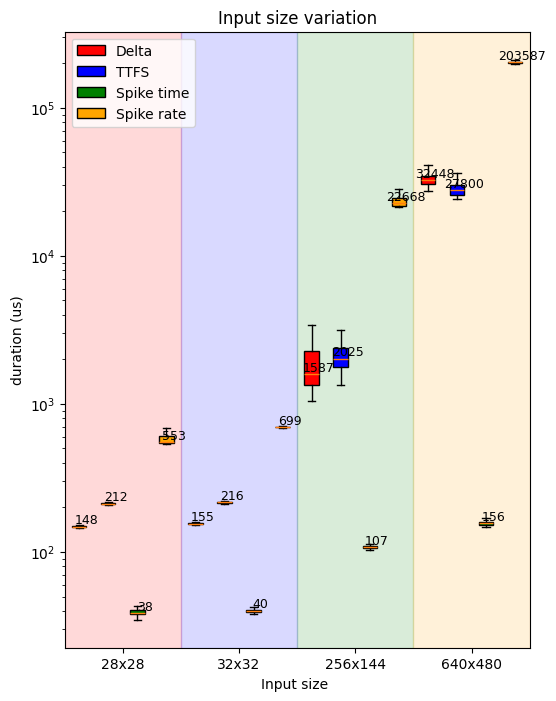

In [45]:
show_boxplot_group(path_directory, files_list, labels=['28x28', '32x32', '256x144', '640x480'], 
                   target_column='duration',
                   title='Input size variation',
                   median=True,
                   save=True,
                   save_path=image_directory_path+'input_size_duration.png')

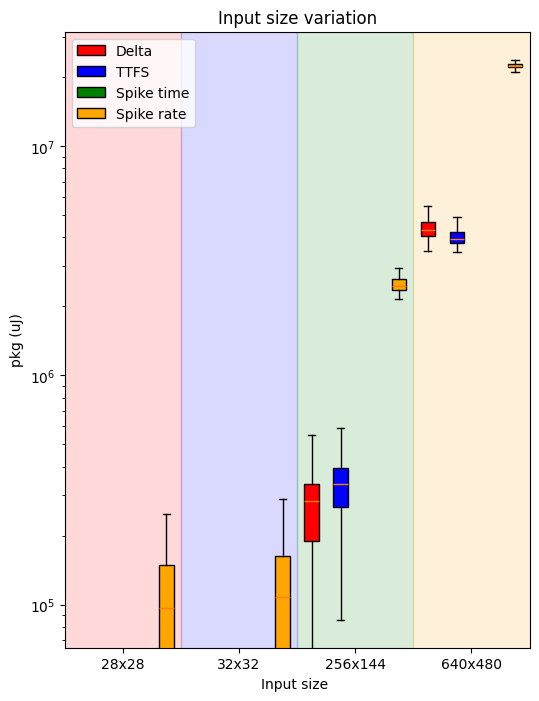

In [46]:
show_boxplot_group(path_directory, files_list, labels=['28x28', '32x32', '256x144', '640x480'], 
                   target_column='pkg',
                   title='Input size variation',
                   save=True,
                   save_path=image_directory_path+'input_size_pkg.png')

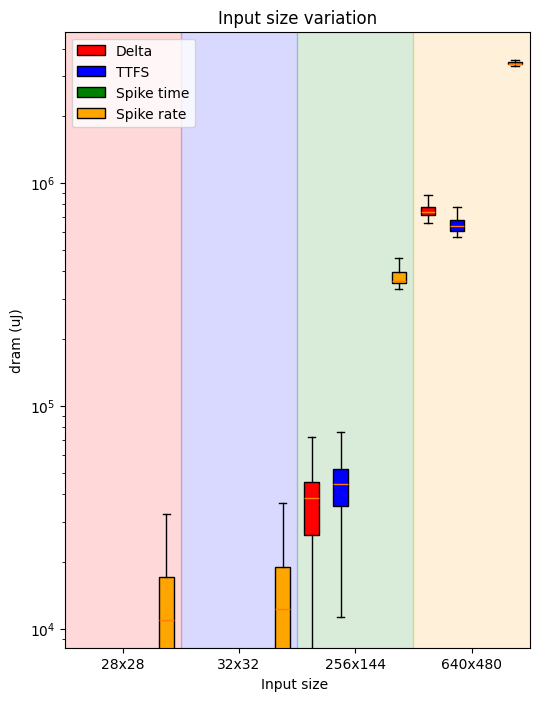

In [47]:
show_boxplot_group(path_directory, files_list, labels=['28x28', '32x32', '256x144', '640x480'], 
                   target_column='dram',
                   title='Input size variation',
                   save=True,
                   save_path=image_directory_path+'input_size_dram.png')

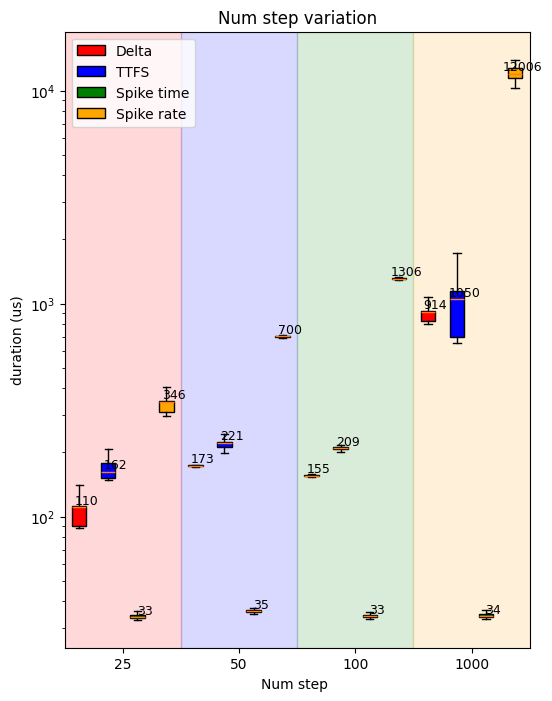

In [62]:
show_boxplot_group(path_directory, files_list[16:32], labels=['25', '50', '100', '1000'], 
                   target_column='duration',
                   title='Num step variation',
                   median=True,
                   save=True,
                   save_path=image_directory_path+'num_step_duration.png')

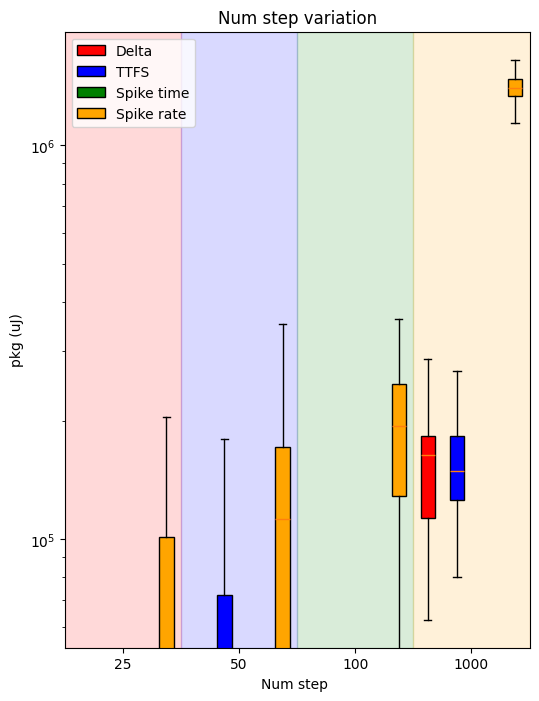

In [61]:
show_boxplot_group(path_directory, files_list[16:32], labels=['25', '50', '100', '1000'], 
                   target_column='pkg',
                   title='Num step variation',
                   save=True,
                   save_path=image_directory_path+'num_step_pkg.png')

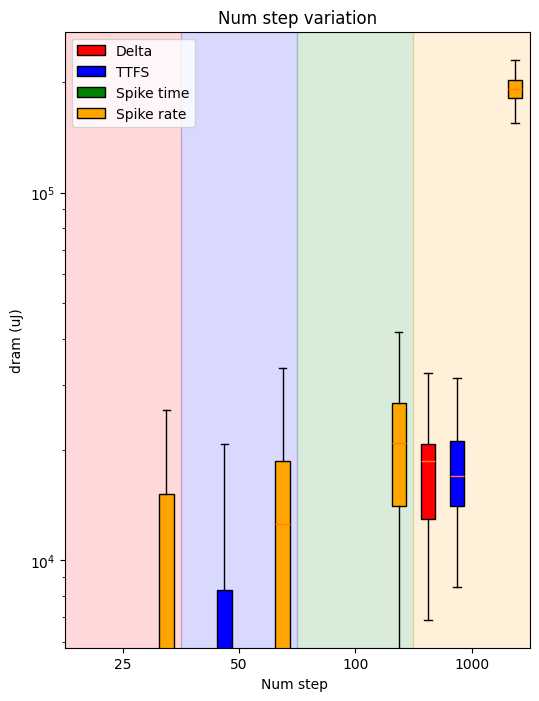

In [60]:
show_boxplot_group(path_directory, files_list[16:32], labels=['25', '50', '100', '1000'], 
                   target_column='dram',
                   title='Num step variation',
                   save=True,
                   save_path=image_directory_path+'num_step_dram.png')

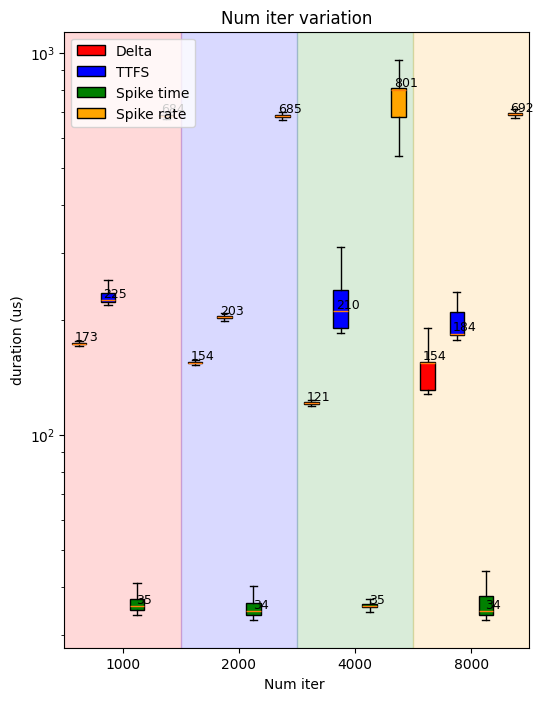

In [59]:
show_boxplot_group(path_directory, files_list[32:48], labels=['1000', '2000', '4000', '8000'], 
                   target_column='duration',
                   title='Num iter variation',
                   median=True,
                   save=True,
                   save_path=image_directory_path+'num_iter_duration.png')

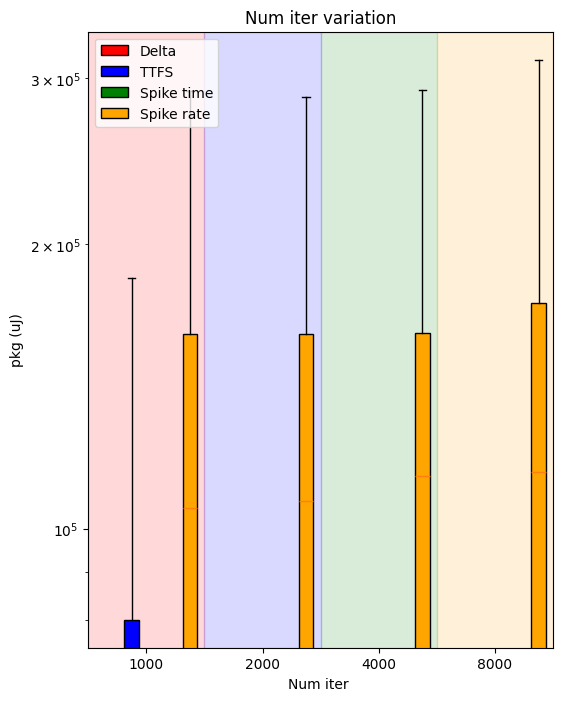

In [58]:
show_boxplot_group(path_directory, files_list[32:48], labels=['1000', '2000', '4000', '8000'], 
                   target_column='pkg',
                   title='Num iter variation',
                   save=True,
                   save_path=image_directory_path+'num_iter_pkg.png')

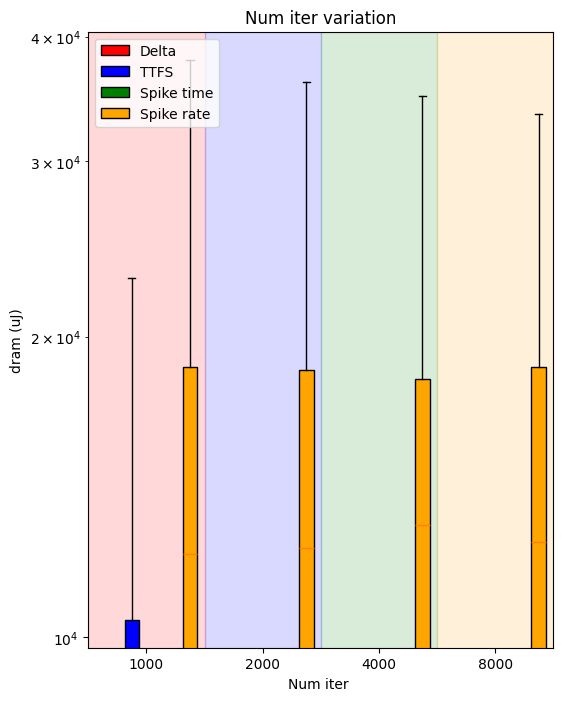

In [57]:
show_boxplot_group(path_directory, files_list[32:48], labels=['1000', '2000', '4000', '8000'], 
                   target_column='dram',
                   title='Num iter variation',
                   save=True,
                   save_path=image_directory_path+'num_iter_dram.png')